# CAO POINTS ANALYSIS
### AUTHOR: ANTE DUJIC
<hr style="border:2px solid black"> </hr>

## INTRODUCTION
<hr style="border:2px solid gray"> </hr>

This notebook gives an overview of how to load CAO points information from the CAO website into a pandas data frame. It also contains the comparison of CAO points in 2019, 2020, and 2021.

[<center><img src="http://www.cao.ie/images/cao.png" width="100"/></center> ](http://www.cao.ie/index.php)

***
### CONTENTS

1. [WHAT IS CAO](#CAO)
2. [LOADING AND SAVING THE DATA](#DATA)
    - 2.1. [LEVEL 8 POINTS - R1 and R2](#R1R2)
        - 2.1.1. [2019, 2020, 2021 (html)](#HTML)
    - 2.2. [LEVEL 8 POINTS - EOS and MID](#EOSMID)
        - 2.2.1. [2020 (xlsx)](#XLSX)
        - 2.2.2. [2019 (pdf)](#PDF)
2. [CONCATENATING THE DATA](#CONCATENATE)

## 1. WHAT IS CAO <a id='CAO'></a>
<hr style="border:2px solid gray"> </hr>

The purpose of the Central Applications Office (CAO) is to process centrally applications for undergraduate courses in Irish Higher Education Institutions (HEIs), and to deal with them in an efficient and fair manner. [1]

Students applying for admission to third level education courses in Ireland apply to the CAO rather than to individual educational institutions such as colleges and universities. The CAO then offers places to students who meet the minimum requirements for a course for which they have applied. If for a particular course there are more qualified applicants than available places, the CAO makes offers to those applicants with the highest score in the CAO points system. If students do not accepts offers, or later decline them because they receive an offer for another course, the CAO makes further offers until all of the places have been filled or until the offer season closes. [2]

## 2. LOADING AND SAVING THE DATA <a id='DATA'></a>
<hr style="border:2px solid gray"> </hr>

In [1]:
# HTTP request
import requests as rq
# Regular expressions
import re
# Dates and time
import datetime as dt
# Data frames
import pandas as pd
# For downloading
import urllib.request as urlrq
# PDF
import camelot
# To use .unescape
import html

### 2.1.  LEVEL 8 POINTS - R1 and R2 <a id='R1R2'></a>
***

Overview

#### 2.1.1. 2019, 2020, 2021 (html) <a id='HTML'></a>

In [2]:
# Current date and time
now = dt.datetime.now()
# Format as a string
nowstr = (now.strftime("%Y%m%d_%H%M%S"))

In [3]:
# Regular expression
re_course = re.compile(r"([A-Z]{2}[0-9]{3})(.*)")

In [4]:
# Defining a dictionary
    # Using website archive to access the wanted data (2019, 2020)
years_dict = {
    "2019": [("data/cao2019" +  nowstr), "https://web.archive.org/web/20191019135815/http://www2.cao.ie:80/points/l8.php"],
    "2020": [("data/cao2020" +  nowstr), "https://web.archive.org/web/20201108133105/http://www2.cao.ie/points/l8.php"],
    "2021": [("data/cao2021" +  nowstr), "http://www2.cao.ie/points/l8.php"]
}

In [5]:
# Loop through the (dict) years
for year, content in years_dict.items():
    # Fetch the CAO points URL
    rq.get (content[1])
    resp = rq.get (content[1])
    # The server uses the wrong encoding
        # Change to "cp1252"
    resp.encoding = "cp1252"
    # Check if OK:
        #Response [200] means OK
    print (year,resp)
    
    # Save the original html file
    with open(content[0] + ".html", "w") as f:
        f.write(resp.text)
        # Keep track of how many courses we process
    
    no_lines = 0
    # Iterating through the lines
    resp.iter_lines()
    resps = resp.iter_lines()
    
    # Open the csv file for writing.
    with open(content[0] + ".csv", "w") as f:
        # Write a header row.
        f.write(','.join(["CODE", "TITLE", "R1_POINTS", "R2_POINTS"]) + "\n")
        # Loop through lines of the response.
        for line in resps:
            # Decode the line, using the wrong encoding
            dline = line.decode("cp1252")
            # Converting &amp; to &
            dline = html.unescape(dline)
            # Match only the lines representing courses
            if re_course.fullmatch(dline):
                # Add one to the lines counter
                no_lines = no_lines + 1
                # The course code
                course_code = dline[:5]
                # The course title
                course_title = dline[7:57]
                # Round one points
                course_points = re.split(' +', dline[60:])
                if len(course_points) != 2:
                    course_points = course_points[:2]
                # Join the fields using a comma
                linesplit = [course_code, course_title, course_points[0], course_points[1]]
                # Rejoin the substrings with commas in between
                f.write(",".join(linesplit) + "\n")   
    # Print the total number of processed lines
    print("Total number of lines in CAO", year, "database is", no_lines)

2019 <Response [200]>
Total number of lines in CAO 2019 database is 930
2020 <Response [200]>
Total number of lines in CAO 2020 database is 961
2021 <Response [200]>
Total number of lines in CAO 2021 database is 949


### 2.2.  LEVEL 8 POINTS - EOS and MID <a id='EOSMID'></a>
***

Overview

#### 2.2.1. 2020 (xlsx) <a id='XLSX'></a>

In [6]:
# Create a file path for the original data
path = ("data/cao2020_eos" +  nowstr + ".xlsx")

In [7]:
urlrq.urlretrieve('http://www2.cao.ie/points/CAOPointsCharts2020.xlsx', path)

('data/cao2020_eos20211123_133024.xlsx',
 <http.client.HTTPMessage at 0x1c9f23fca00>)

In [8]:
# Download and parse the excel spreadsheet
df2020_eos = pd.read_excel("http://www2.cao.ie/points/CAOPointsCharts2020.xlsx", skiprows = 10)
#df2020_eos

In [66]:
#columnsNamesArr = df2020_eos.columns.values
#print(columnsNamesArr)
# Filter out only level 8 courses
df2020_eos = df2020_eos.loc[df2020_eos["LEVEL"] == 8]
# Remove last 12 columns
df2020_eos = df2020_eos.iloc[: , :-12]
# Save pandas data frame to disk
df2020_eos.to_csv(("data/cao2020_eos" +  nowstr + ".csv"))
#df2020_eos

***

#### 2019 (pdf) <a id='PDF'></a>

In [10]:
path2019pdf = 'data/cao2019_eos' + nowstr + '.pdf'

In [11]:
resp_pdf = rq.get("http://www2.cao.ie/points/lvl8_19.pdf")
resp_pdf

<Response [200]>

In [12]:
with open(path2019pdf, 'wb') as f:
    f.write(resp_pdf.content)

In [13]:
# Read the pdf file
tables = camelot.read_pdf(path2019pdf, pages = "all", flavor = "lattice")

In [14]:
# Check the total number of tables read
print ("Tables:", tables.n)

Tables: 18


In [133]:
# Create empty list
table_total = []
# Loop through all 18 tables
for x in range (0,18):
    df = tables[x].df
    # Append all 18 tables to table_total
    table_total.append(df)

# Concatenate all tables  
table = pd.concat(table_total)
# Remove old column names
table = table.iloc[1: , :]
# Name the columns
table.columns = ["CODE","TITLE", "EOS_2019", "MID_2019"]
# Sort table by "CODE" column
table.sort_values("CODE", inplace = True)
# Remove first 35 rows (name of the college)
table = table.iloc[35: , :]
# Save .csv file
table.to_csv("data/cao2019_eos" +  nowstr + ".csv", index = False)
table

,CODE,TITLE,EOS_2019,MID_2019
21,AC120,International Business,234,269
22,AC137,Liberal Arts,252,275
3,AD101,First Year Art & Design (Common Entry),# +matric 550,
4,AD102,Graphic Design and Moving Image Design,# +matric 635,
5,AD103,Textile & Surface Design and Jewellery & Objects,# +matric 545,
...,...,...,...,...
37,WD200,Arts (options),221,296
38,WD210,Software Systems Development,271,329
39,WD211,Creative Computing,275,322
40,WD212,Recreation and Sport Management,274,311


## 3. CONCATENATING THE DATA <a id='CONCATENATE'></a>
<hr style="border:2px solid gray"> </hr>

In [16]:
# Defining a dictionary
df_dict = {
    "2019": [("data/cao2019" +  nowstr)],
    "2019_eos": [("data/cao2019_eos" +  nowstr)],
    "2020": [("data/cao2020" +  nowstr)],
    "2020_eos": [("data/cao2020_eos" +  nowstr)],
    "2021": [("data/cao2021" +  nowstr)]
}

In [17]:
# Creating an empty list for adding dataframes
dataframe = []
# Loop - reading the csv files and appending to list
for year, path in df_dict.items():
    data = pd.read_csv ((path[0] + ".csv"), encoding='cp1252')
    dataframe.append (data)
# Conecating all dataframes into one
allcourses = pd.concat (dataframe)
# Filering out columns
allcourses = allcourses [["CODE", "TITLE"]]
# Remove duplicates created by conecating
allcourses.drop_duplicates(subset=["CODE"], inplace=True, ignore_index=False)
# Sort the table by "CODE" column
allcourses.sort_values("CODE", inplace = True)
#allcourses

In [18]:
#2019 df
dataframe[0].columns = ["CODE","TITLE", "R1_POINTS_2019", "R2_POINTS_2019"]
#2019_eos is #dataframe[1]
#2020 df
dataframe[2].columns = ["CODE","TITLE", "R1_POINTS_2020", "R2_POINTS_2020"]
#2020_eos df
dataframe[3] = dataframe[3][["COURSE CODE2","EOS", "EOS Mid-point"]]
dataframe[3].columns = ["CODE","EOS_2020", "MID_2020"]
#2021 df
dataframe[4].columns = ["CODE","TITLE", "R1_POINTS_2021", "R2_POINTS_2021"]

In [19]:
# Loop - set "CODE" column as index for all df
for i in dataframe:
    i.set_index("CODE", inplace=True)

In [20]:
allcourses.set_index("CODE", inplace=True)
allcourses = allcourses.join(dataframe[0][["R1_POINTS_2019", "R2_POINTS_2019"]])
#allcourses

In [21]:
allcourses = allcourses.join(dataframe[1][["EOS_2019", "MID_2019"]])
#allcourses

In [22]:
allcourses = allcourses.join(dataframe[2][["R1_POINTS_2020", "R2_POINTS_2020"]])
#allcourses

In [23]:
allcourses = allcourses.join(dataframe[3][["EOS_2020", "MID_2020"]])
#allcourses

In [24]:
allcourses = allcourses.join(dataframe[4][["R1_POINTS_2021", "R2_POINTS_2021"]])
#allcourses

In [37]:
#allcourses.sort_values("CODE", inplace = True)
allcourses.to_csv ("Final_table.csv")
#allcourses

## TESTING

In [154]:
df = pd.read_csv ("Final_table.csv")
df = df ["EOS_2019"]
df

0                 234
1                 252
2       # +matric 550
3       # +matric 635
4       # +matric 545
            ...      
1142              274
1143              273
1144              NaN
1145              NaN
1146              NaN
Name: EOS_2019, Length: 1147, dtype: object

In [134]:
#df.dtypes

In [155]:
df = pd.to_numeric(df,errors='coerce')
df

0       234.0
1       252.0
2         NaN
3         NaN
4         NaN
        ...  
1142    274.0
1143    273.0
1144      NaN
1145      NaN
1146      NaN
Name: EOS_2019, Length: 1147, dtype: float64

<AxesSubplot:xlabel='EOS_2019', ylabel='Count'>

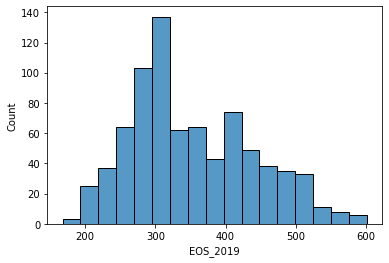

In [156]:
import seaborn as sns
sns.histplot (df)

### DATA COMPARISON

# CONCLUSION

***

## REFERENCES
***

- [1] http://www2.cao.ie/handbook/handbook2022/hb.pdf
- [2] https://en.wikipedia.org/wiki/Central_Applications_Office

## LINKS TO CHECK